In [5]:
##data dictionary
'''PassengerId- id of the pasangers
Survived- if survived 1 otherwise 0
Pclass- passengers class like 1st,2nd
Name - name of pasangers
Sex - gender of pasangers
Age - age of pasangers
SibSp - number of siblings or spouse in the ship
Parch - no of parents pr childrens in the ship
Ticket - ticket number
Fare- fare paid by passengers
Cabin - cabin number
Embarked -Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)'''


'PassengerId- id of the pasangers\nSurvived- if survived 1 otherwise 0\nPclass- passengers class like 1st,2nd\nName - name of pasangers\nSex - gender of pasangers\nAge - age of pasangers\nSibSp - number of siblings or spouse in the ship\nParch - no of parents pr childrens in the ship\nTicket - ticket number\nFare- fare paid by passengers\nCabin - cabin number\nEmbarked -Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)'

In [206]:
'''Import necessary libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from feature_engine.outliers import Winsorizer 


In [207]:
##load the data set
data = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\Data science\podigry_infotech\task 2\train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [209]:
##remove all unnecessary columns
df = data.drop(["PassengerId","Name","Ticket","Fare","Cabin"],axis = 1)
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [210]:
#check is there any missing values
df.isnull().sum()

print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [211]:
#remove the null values
df.dropna(inplace = True)
df.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [179]:
##perform exploratory data analysis
### 1st business moment (mean,median,mode)
columns = ["Survived","Pclass","Age","SibSp","Parch"]
## MEAN
for i in columns:
    mean = df[i].mean()
    print(f"mean_value for {i}:{mean}")

##MEDIAN
for i in columns:
    median = df[i].median()
    print(f"median_value for {i}:{median}")

## MODE
for i in columns:
    mode = df[i].mode()
    print(f"mode_value for {i}:{mode[0]}")
    


mean_value for Survived:0.4044943820224719
mean_value for Pclass:2.240168539325843
mean_value for Age:29.64209269662921
mean_value for SibSp:0.5140449438202247
mean_value for Parch:0.43258426966292135
median_value for Survived:0.0
median_value for Pclass:2.0
median_value for Age:28.0
median_value for SibSp:0.0
median_value for Parch:0.0
mode_value for Survived:0
mode_value for Pclass:3
mode_value for Age:24.0
mode_value for SibSp:0
mode_value for Parch:0


In [180]:
##2nd business moment(variance,standard deviation,range)
## Variance
for i in columns:
    variance = df[i].var()
    print(f"variance_value for {i}:{variance}")

## Standard deviation
for i in columns:
    std = df[i].std()
    print(f"standard deviation for {i}:{std}")

## Range 
for i in columns:
    range_value = (df[i].max() - df[i].min())
    print(f"range_value for {i}:{range_value}")
    


variance_value for Survived:0.2412174655098848
variance_value for Pclass:0.7003251473632641
variance_value for Age:210.04510405327994
variance_value for SibSp:0.8661878348267197
variance_value for Parch:0.7296259422557246
standard deviation for Survived:0.4911389472541195
standard deviation for Pclass:0.8368543166903449
standard deviation for Age:14.49293290032352
standard deviation for SibSp:0.9306921267673428
standard deviation for Parch:0.8541814457454134
range_value for Survived:1
range_value for Pclass:2
range_value for Age:79.58
range_value for SibSp:5
range_value for Parch:6


In [181]:
##3rd(skewness) and 4th(kurtosis) business moment
for i in columns:
    skewness = df[i].skew()
    kurtosis = df[i].kurt()
    print(f"skewness  value for {i}:{skewness}")
    print(f"kurtosis value for {i}:{kurtosis}")


skewness  value for Survived:0.39001039694687184
kurtosis value for Survived:-1.8531051639694196
skewness  value for Pclass:-0.47560430348673616
kurtosis value for Pclass:-1.4100832809724875
skewness  value for Age:0.38888061787537076
kurtosis value for Age:0.18794879303314982
skewness  value for SibSp:2.5151074727121165
kurtosis value for SibSp:7.018184703808293
skewness  value for Parch:2.6141772747751393
kurtosis value for Parch:8.822003398966412


<Axes: ylabel='Density'>

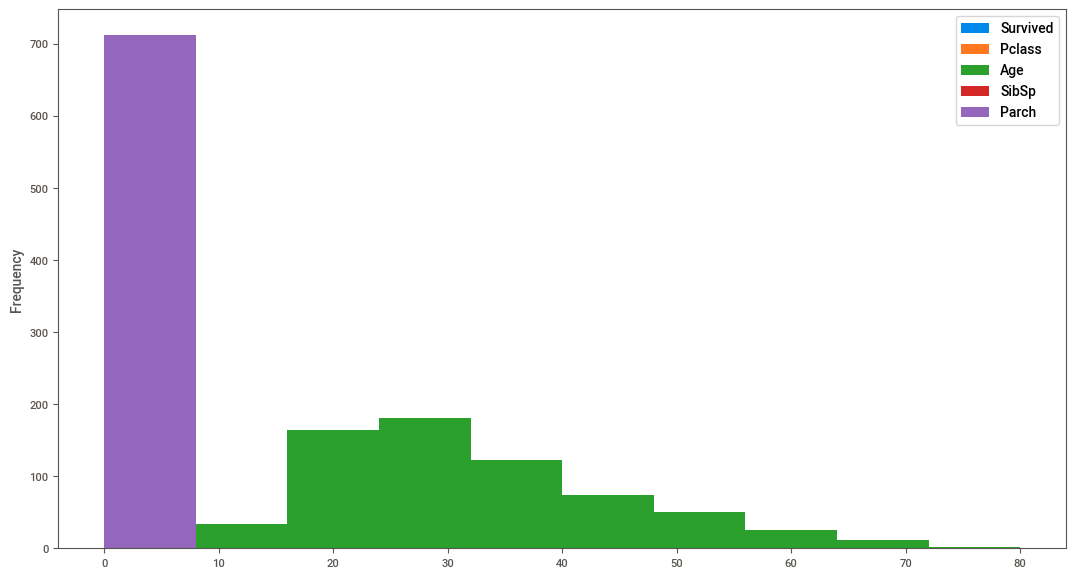

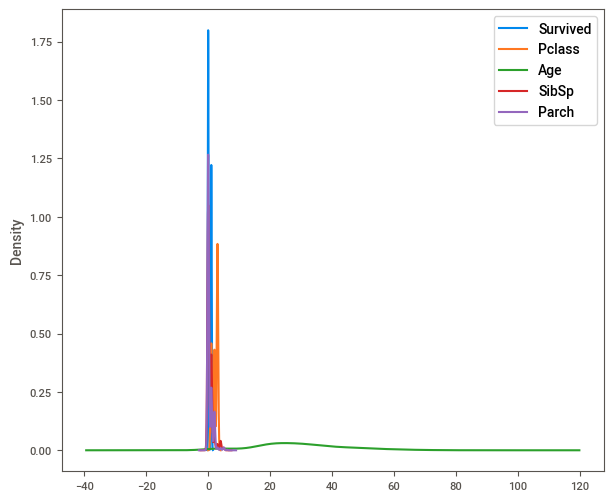

In [212]:
##plotting graphs
##histogram
df[columns].plot(kind = "hist",sharey = False,figsize= (13,7))

##Density plot
df[columns].plot(kind = "density",sharey = False,figsize = (7,6))

#the data is right skewed so there is may be outliers


In [183]:
##Aouto EDA
##sweetviz
import sweetviz as sv
report = sv.analyze(df)
report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [184]:
##Dtale
import dtale as dl
report = dl.show(df)
report.open_browser()

Text(0, 0.5, 'count')

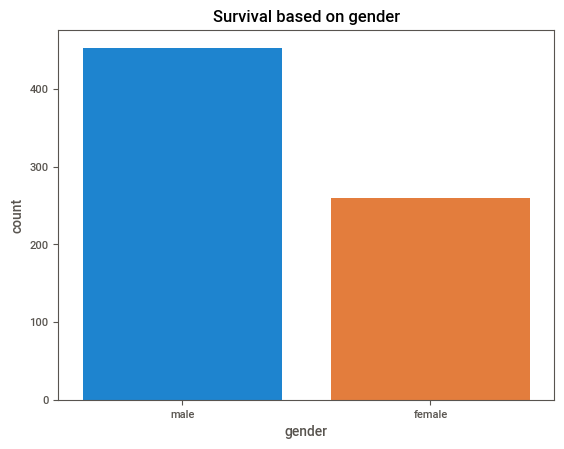

In [215]:
##survival based on Gender
sns.countplot(data = df,x = "Sex",hue = "Sex")
plt.title('Survival based on gender')
plt.xlabel("gender")
plt.ylabel("count")

2024-10-18 14:05:20,707 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-18 14:05:20,713 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0, 0.5, 'count')

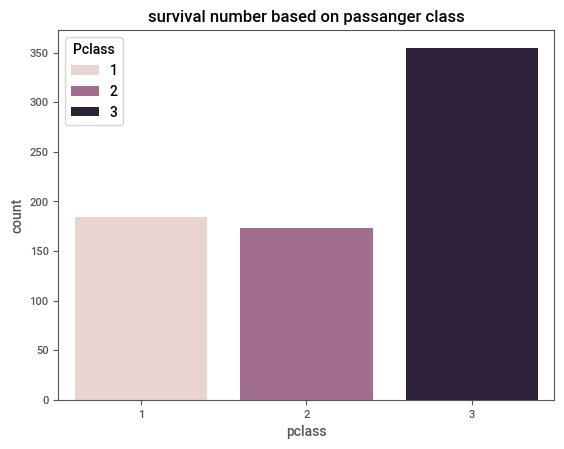

In [217]:
##survival rate based on passanger class
sns.countplot(data = df,x = 'Pclass',hue = 'Pclass')
plt.title("survival number based on passanger class")
plt.xlabel('pclass')
plt.ylabel('count')

2024-10-18 14:26:02,516 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16124\3692545687.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


2024-10-18 14:26:02,540 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


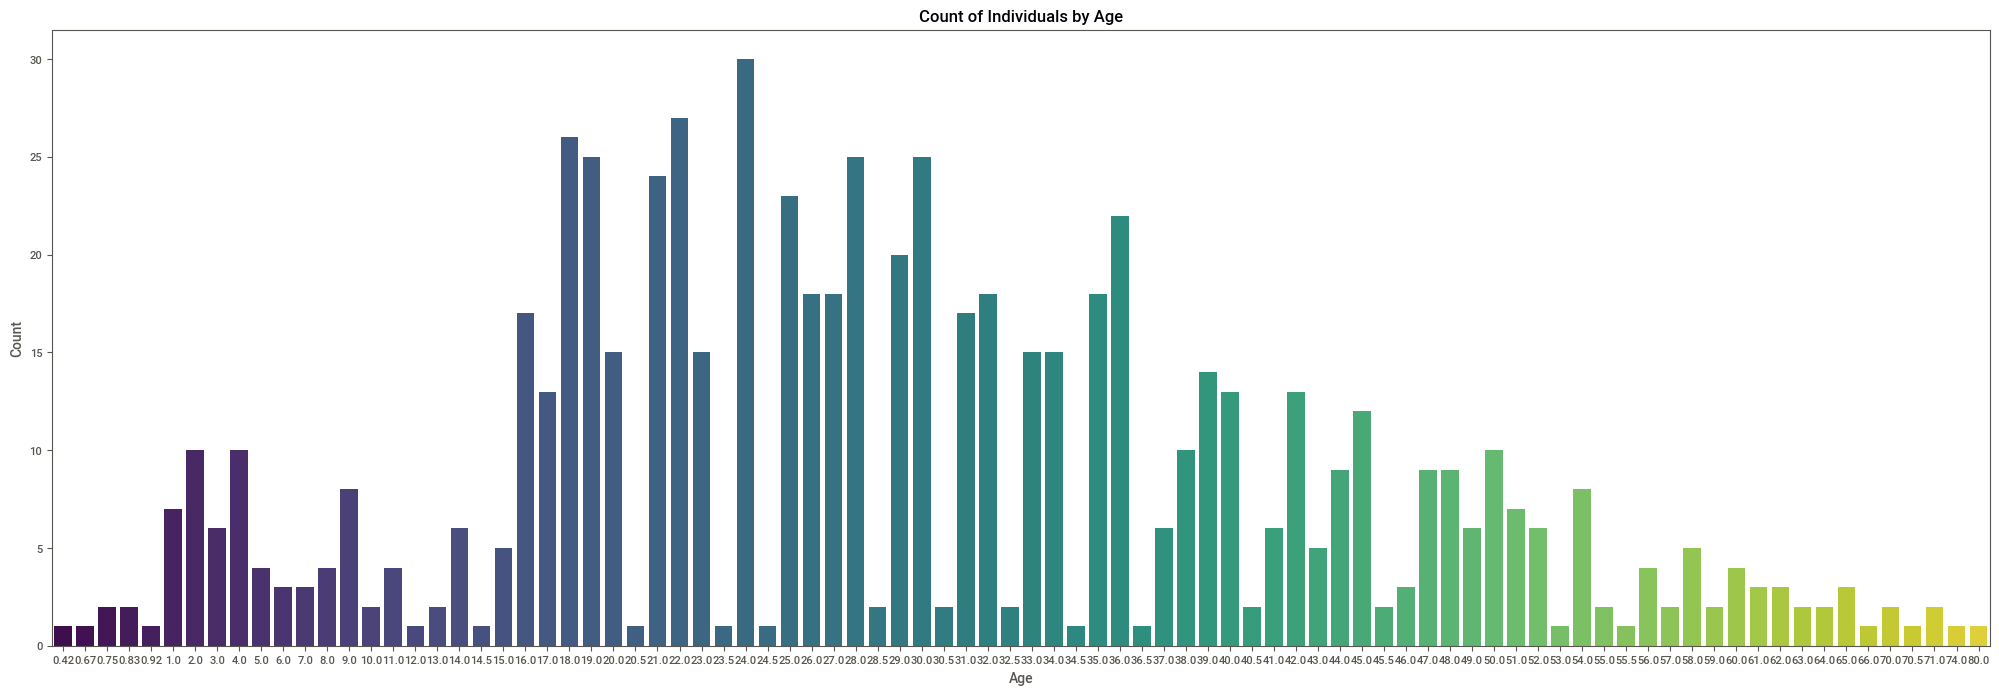

In [227]:
##survival number based on age
# Group the data by 'Age' and count occurrences
age_grouped = df.groupby('Age').size().reset_index(name='Count')

# Plotting the counts based on Age
plt.figure(figsize=(25, 8))
sns.barplot(data=age_grouped, x='Age', y='Count', palette='viridis')
plt.title('Count of Individuals by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.show()